In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [18]:
#Standard Model value
sm = 116591810e-11
sigma_sm = 43e-11

#FNAL value
fnal = 116592055e-11
sigma_fnal = 24e-11

#BNL value
bnl =  116592080e-11
sigma_bnl = 63e-11

#Experiment average
exp =  116592059e-11
sigma_exp = 22e-11

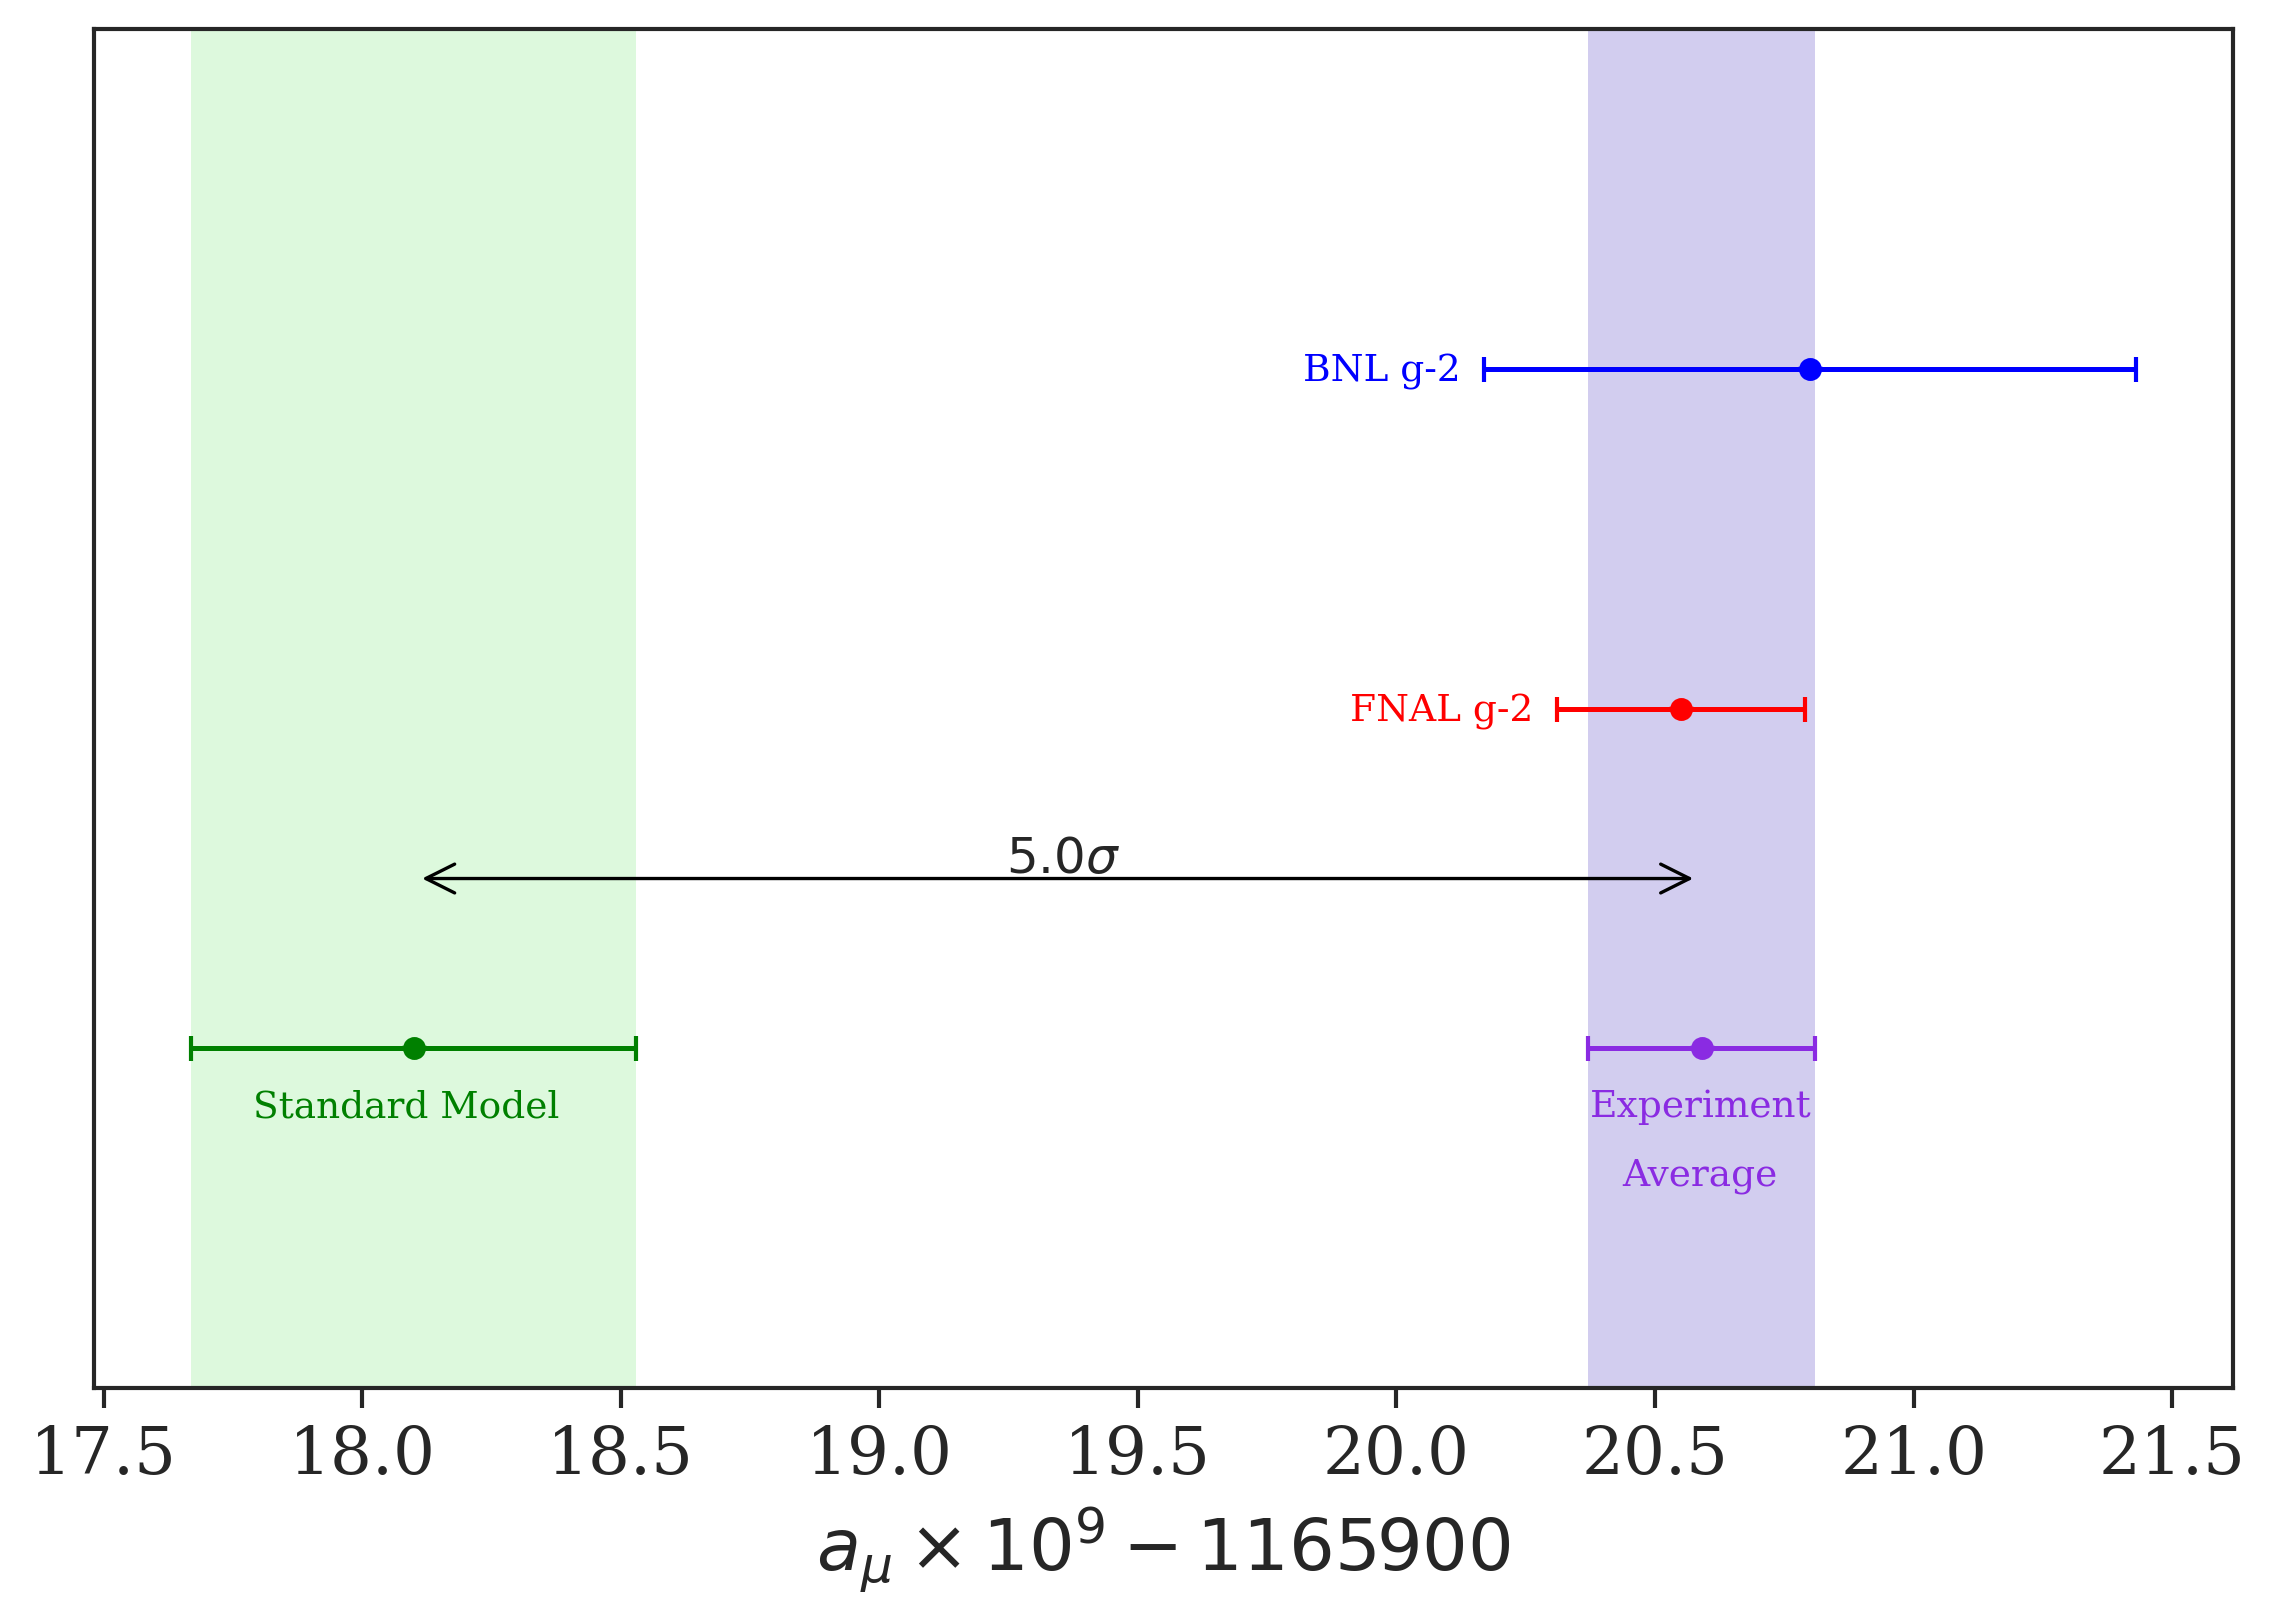

In [122]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 

#Standard Model
plt.errorbar(sm*1e9-1165900, 1,0, sigma_sm*1e9, 'o', ms = 4.5, capsize=3, color = "green", label = "Standard Model")
plt.annotate("Standard Model", xy = (sm*1e9-1165900- sigma_sm*1e9+0.12,0.9), size = 9, color = "Green")
plt.axvspan(sm*1e9-1165900 - sigma_sm*1e9 , sm*1e9-1165900  +sigma_sm*1e9 , color='lightgreen', alpha=0.3, lw=0)

#Experimental Average
plt.errorbar(exp*1e9-1165900, 1,0, sigma_exp*1e9, 'o', ms = 4.5, capsize=3, color = "blueviolet",
             label = "Experimental average")
plt.axvspan(exp*1e9-1165900 - sigma_exp*1e9 , exp*1e9-1165900  +sigma_exp*1e9 , color='slateblue', alpha=0.3
            , lw=0)
plt.annotate("Experiment", xy = (exp*1e9-1165900- sigma_exp*1e9+0.005,0.9), size = 9, color = "blueviolet")
plt.annotate("Average", xy = (exp*1e9-1165900- sigma_exp*1e9+0.067,0.8), size = 9, color = "blueviolet")


#FNAL
plt.errorbar(fnal*1e9-1165900, 1.5,0, sigma_fnal*1e9, 'o', ms = 4.5, capsize=3, color = "red", label = "FNAL")
plt.annotate("FNAL g-2", xy = (fnal*1e9-1165900- sigma_fnal*1e9-0.4,1.483), size = 9, color = "red")

#BNL
plt.errorbar(bnl*1e9-1165900, 2,0, sigma_bnl*1e9, 'o', ms = 4.5, capsize=3, color = "blue", label = "BNL")
plt.annotate("BNL g-2", xy = (bnl*1e9-1165900- sigma_bnl*1e9-0.35,1.983), size = 9, color = "blue")


#Arrow
plt.annotate('', xy=(sm*1e9-1165900, 1.25), xytext=(exp*1e9-1165900, 1.25), arrowprops={'arrowstyle': '<->', "color": "black"})
plt.annotate(r'$5.0\sigma$', xy=((sm*1e9-1165900 + exp*1e9-1165900)/2-0.1, 1.26), size = 12)

plt.ylim([0.5,2.5])
plt.yticks([])
plt.xlabel(r"$a_\mu \times 10^{9} - 1165900$")
#plt.legend()
plt.show()